# Motivations et notions de base



## Quelques aspects techniques avant de commencer

Il est très important d'exécuter la section ci-dessous, même si, d'un point de vue pratique, elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.

### Installation des packages R

Choisissez une des trois options suivantes pour installer les packages R en fonction de votre situation et de vos préférences.

#### Sur votre ordinateur personnel

**Option 1 :** installer les packages à la localisation par défaut

In [ ]:
# Installer les packages à la localisation par défaut
install.packages("ggplot2") 
install.packages ("scale")

#### Sur les machines virtuelles FPSE

L'option 1 ne fonctionne pas sur les machines virtuelles FPSE car nous n'avons pas la permission d'écrire à la localisation par défaut. Il faut donc choisir l'option 2 ou 3 selon votre préférence. 

**Option 2 :** installer les packages sur le disque H (`H:/`)

Avantage : vous n'aurez pas besoin de réinstaller les packages à chaque fois que vous vous connectez à la machine virtuelle car le contenu de votre disque H personnel est conservé.  
Désavantage : les packages occupent de l'espace de stockage sur votre disque H.

In [ ]:
# Pour installer les packages R sur votre disque H

# Créer un répertoire sur le disque H pour les packages R
dir.create("H:/R/win-library/4.4", recursive = TRUE)

# Indiquer à R d'installer les packages R dans ce répertoire 
.libPaths("H:/R/win-library/4.4")

# Installer les packages 
install.packages("ggplot2") 
install.packages ("scale")

**Option 3 :** installer les packages sur le disque local (`C:/`)

Avantage : les packages n'occupent pas d'espace de stockage sur votre disque H.  
Désavantage : vous devrez réinstaller les packages à chaque fois que vous vous connectez à la machine virtuelle car le contenu du disque local n'est pas conservé lorsque vous vous déconnectez.  

In [ ]:
# Pour installer les packages R sur le disque local

# Indiquer à R d'installer les packages R dans ce répertoire 
# ATTENTION : remplacer "votre_identifiant_isis" dans la commande suivante par
# votre identifiant ISIS (nom court), e.g. "C:/Users/wuensch/R/win-library/4.4"
.libPaths("C:/Users/votre_identifiant_isis/R/win-library/4.4")

# Installer les packages 
install.packages("ggplot2") 
install.packages ("scale")

### Chargement des packages R

Une fois installés, les packages R doivent être chargés dans la session R. Cette étape devra être exécutée à chaque fois que vous ouvrez une nouvelle session R, indépendamment d'où les packages sont installés.

In [ ]:
# Chargement des packages
library(ggplot2) 
library(scales)

### Autres aspects techniques

In [ ]:
# Couleur pour le graphique
darkred  = "#8B0000"   

## Création d'un jeu de données simulé

Pour introduire les notions de base qui nous accompagneront pour le reste du cours, nous allons simuler un jeu de données qui nous permettra de modifier facilement les caractéristiques de l'étude exemple et d'en observer les effets.

Dans cette étude exemple, nous allons simuler un jeu de données dans lequel nous mesurons les niveaux d'anxiété état avec la sous-échelle état du State-Trait Anxiety Questionnaire (STAI-State) et les niveaux socio-économiques de 120 participant-e-x-s. Le niveau socio-économique va de 1 à 20, 1 étant le niveau le plus bas et 20 le niveau le plus élevé. Le niveau d'anxiété état varie entre 20 et 80, avec des scores au-delà de 50 indiquant une souffrance importante.

Dans le jeu de données que nous allons simuler, nous allons aussi insérer une relation entre les scores d'anxiété et le niveau socio-économique.


In [ ]:
set.seed(1223) # cela a pour but de rendre les analyses reproducibles

# Nombre de participant-e-x-s
n <- 120

# Générer un statut socio-économique entre 1 et 20
socioecon <- rep(0:19, length.out = n)


# Simuler les scores d'anxiété avec une distribution gamma ajustée
base_anxiety <- round(qgamma(ppoints(n), shape = 10, scale = 100))  # Ajustement pour réduire les 20
base_anxiety <- scales::rescale(base_anxiety, to = c(20, 80))


# Générer des scores d’anxiété influencés par le statut socio-économique
anxiety_scores <- round(base_anxiety - socioecon * 2 + rnorm(n, 0, 5))
anxiety_scores <- anxiety_scores + 25

anxiety_scores <- pmax(pmin(anxiety_scores, 80), 20)


# Création du dataset final
simulated_data <- data.frame(
  sub_id = 1:n,                   # Identifiant des participant-e-x-s
  socioecon = socioecon,          # Statut socio-économique
  anxiety = anxiety_scores        # Score d'anxiété
)

# Vérification des premières lignes
head(simulated_data)



,sub_id,socioecon,anxiety
,<int>,<int>,<dbl>
1,1,0,47
2,2,1,43
3,3,2,40
4,4,3,39
5,5,4,47
6,6,5,45


## La distribution 

Un concept très important est celui de la distribution des données. La distribution des données décrit comment les valeurs d'une variable sont réparties. Elle peut être représentée graphiquement par des histogrammes ou des courbes de densité. Cela sera un concept central pour tous les chapitres du cours sur les méthodes bayésiennes, mais il est aussi au cœur des statistiques fréquentistes.

Une manière très intuitive et pratique d'appréhender le concept de distribution est la représentation graphique en histogramme.

Nous savons que l'échelle d'anxiété varie entre 20 et 80. Ce que nous allons faire dans la construction de l'histogramme, c'est compter le nombre de participant-e-x-s qui ont un score contenu dans certains intervalles de valeurs, par exemple dans l'intervalle 20-25, 25-30, 35-40, ... 75-80. Ensuite, dans l'histogramme, nous traçons des barres pour chaque intervalle, la hauteur des barres indiquant combien de participants ont rapporté une valeur contenue dans cet intervalle dans notre échantillon. Cela nous permet d'identifier quelles sont les valeurs qui apparaissent le plus souvent dans l'échantillon et quelles sont les valeurs plus rares.

L'unité de regroupement que nous avons choisie ici est de 5, mais nous pouvons la modifier selon nos besoins. Dans le code ci-dessous, vous pouvez modifier cette valeur et voir comment cela impacte la représentation de la distribution des données.

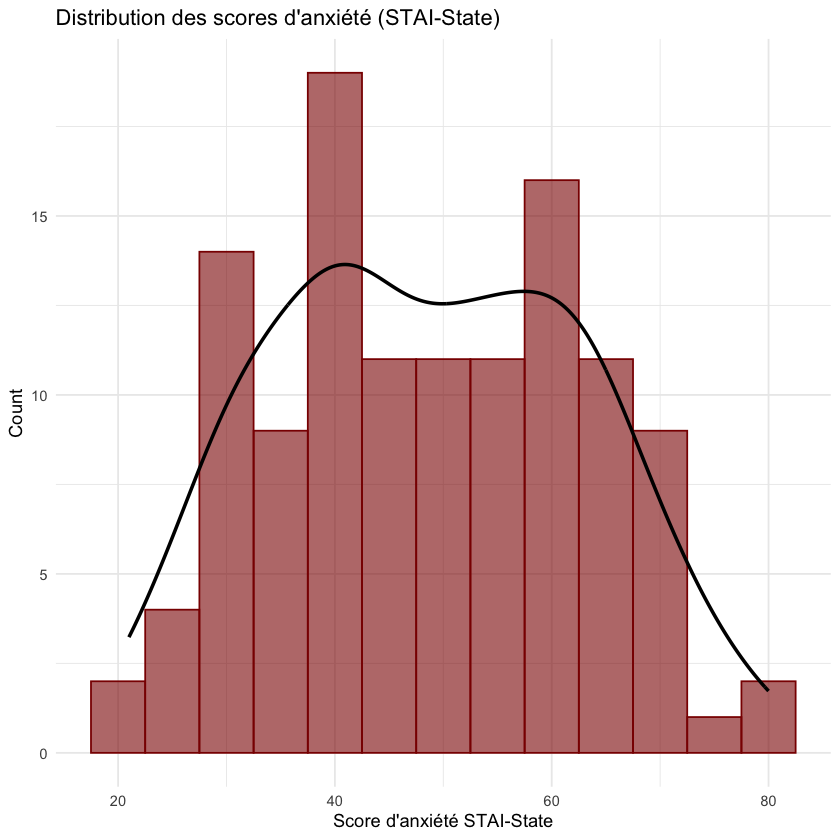

In [ ]:
bin_size = 5

ggplot(simulated_data, aes(x = anxiety)) +
  geom_histogram(binwidth = bin_size, fill = darkred, color = darkred, alpha = 0.6) +
  geom_density(aes(y = ..count.. * bin_size),  color = "black",  linewidth = 1) +  # Ajustement de l'échelle
  labs(title = "Distribution des scores d'anxiété (STAI-State)",
       x = "Score d'anxiété STAI-State",
       y = "Count") +
  theme_minimal()


## L'estimation des paramètres dans un modèle

Un autre concept très important est celui de paramètre (souvent noté $\theta$). Ce concept nous accompagnera également pour la suite des chapitres de ce cours. Un paramètre dans un modèle statistique est une valeur numérique qui caractérise une relation entre les variables dans une population. Souvent, nos hypothèses de recherche sont formalisées spécifiquement par un de ces paramètres. Pour cela, nous verrons plus tard dans le cours la notation $P(D | \theta)$ qui se réfère à la vraisemblance, c'est-à-dire la probabilité d'observer certaines données étant donné notre hypothèse. Le processus d'estimation des paramètres est au cœur des statistiques fréquentistes et bayésiennes, même s'il se fait par des techniques différentes. L'estimation des paramètres aborde la question de savoir quelles valeurs de $\theta$ sont de bonnes estimations, étant donné certaines données $D$, sur la base d'un modèle $M$ avec des paramètres $\theta$.

Il existe beaucoup de modèles différents, mais en principe, vous êtes déjà très familier-e-x-s avec le concept de paramètres dans le modèle linéaire général (GLM). Pour illustrer concrètement cela, nous pouvons prendre notre exemple dans lequel nous souhaitons prédire le score d'anxiété (variable dépendante $y$) en fonction du statut socio-économique (variable indépendante $x$) et appliquer un GLM qui consiste en une simple régression linéaire.

Le modèle de régression linéaire s'écrit comme suit :

$$\hat{y} = \beta_0 + \beta_1 x + \epsilon, \epsilon \sim Normal(0, \sigma)$$

où :

* $\hat{y}$ : variable prédite par le modèle, e.g., le score d'anxiété prédit par le modèle
* $y$ : variable dépendante, e.g., c'est le score d'anxiété mesuré
* $x$ : variable indépendante, e.g., le statut socio-économique qui varie entre 1 et 20
* $\beta_0$ : intercept (ordonnée à l'origine), c'est le paramètre qui représente la valeur moyenne de $\hat{y}$ lorsque $x=0$.
* $\beta_1$ : coefficient de régression, c'est le paramètre qui représente le changement moyen de $\hat{y}$ pour une unité de changement de $x$.
* $\epsilon$ : terme d'erreur (résidus) qui représente la variation de $y$ non expliquée par $x$. Le modèle assume que les résidus suivent une distribution normale autour de 0 avec une certaine variance ($\sigma$). Le symbole $\sim$ signifie "sont distribués selon".

Donc dans le cas d'une régression linéaire, trois paramètres doivent être estimés : $\beta_0$, $\beta_1$ et $\sigma$.

Dans le langage de programmation R, nous pouvons utiliser la fonction `lm` qui implémente un régression linaire pour des études inter-sujets. Cette fonction va estimer les paramètres du modèle de régression en trouvant les paramètres qui décrivent le mieux les données (sous la contrainte du modèle de régression linéaire).

Cela peut être fait comme suit :



In [ ]:
glm_anxiety = lm(anxiety ~ socioecon, data = simulated_data)


Nous pouvons accéder aux coefficients $\beta_0$ (intercept) et $\beta_1$ comme suit :

In [25]:
glm_anxiety


Call:
lm(formula = anxiety ~ socioecon, data = simulated_data)

Coefficients:
(Intercept)    socioecon  
     62.619       -1.482  


Et nous pouvons accéder au coefficent $\sigma$ (variance des résidus) comme suit :

In [27]:
summary(glm_anxiety)$sigma

[1] 11.31538

Le coefficient $\beta_0$ (`Intercept`) représente la valeur prédite du score d'anxiété lorsque le statut socio-économique (`socioecon`) est égal à 0. Cela signifie que, pour le statut socio-économique le plus bas de notre échelle, le niveau d'anxiété prédit par notre modèle est d'environ 62.

Le coefficient $\beta_1$ (`socioecon`) représente la pente et indique de combien le score d’anxiété change pour chaque augmentation d'une unité du statut socio-économique. Dans notre cas, chaque augmentation d'une unité du statut socio-économique prédit une diminution du score d'anxiété d'environ 1.5.

Le coefficient $\sigma$ représente la variance du terme d'erreur dans l'unité de l'échelle du score d'anxiété.

Nous pouvons aussi représenter le modèle de regression avec un graphique comme suit :

`geom_smooth()` using formula = 'y ~ x'


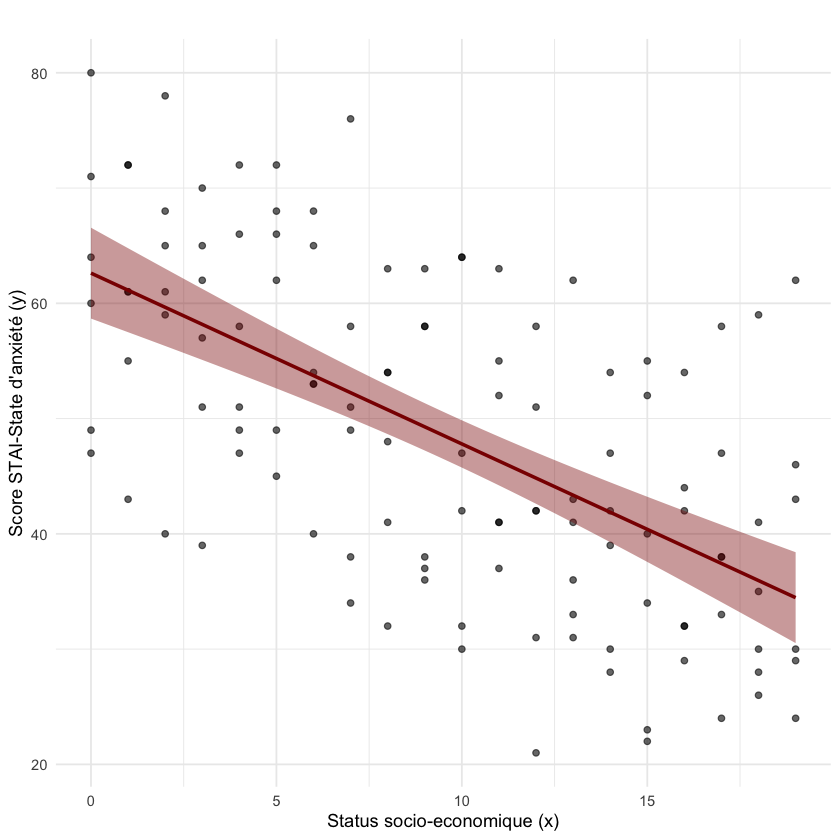

In [ ]:
ggplot(simulated_data, aes(x = socioecon, y = anxiety)) +
  geom_point(color = "black", alpha = 0.6) +  # Points correspondant aux données individuelles des participant-e-x-s
  geom_smooth(method = "lm", color = darkred, se = TRUE, fill = darkred) +  # Régression
  labs(title = "",
       x = "Statut socio-economique (x)",
       y = "Score STAI-State d'anxiété (y)") +
  theme_minimal()


Dans la partie de visualisation du modèle, nous pouvons aussi visualiser la distribution des résidus et effectuer une inspection visuelle des postulats.

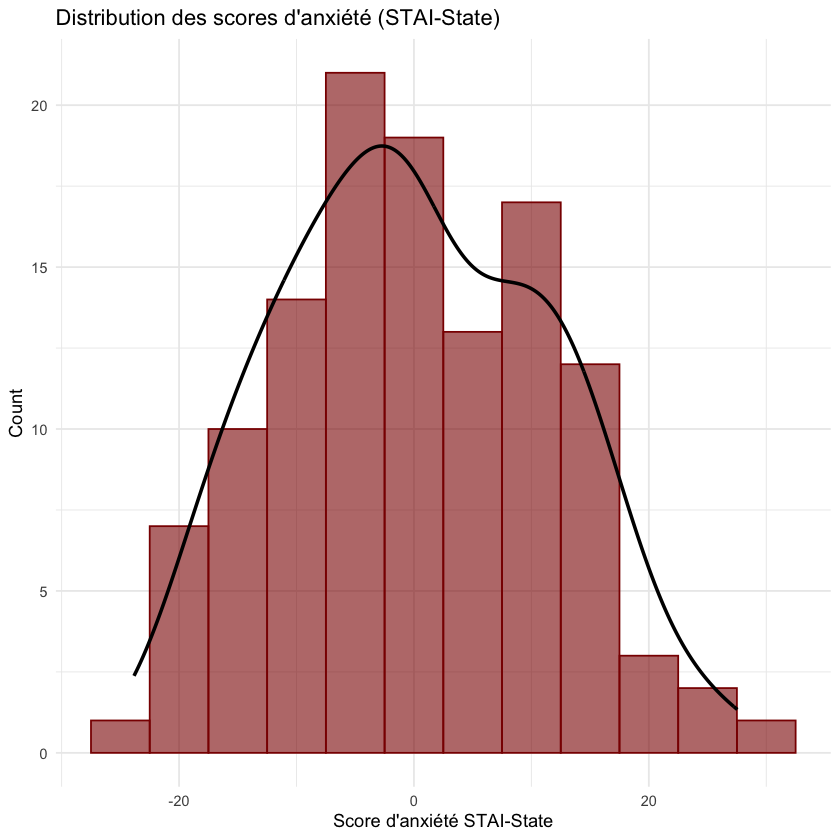

In [ ]:
residuals = summary(glm_anxiety)$residuals

bin_size = 5

ggplot(simulated_data, aes(x = residuals )) +
  geom_histogram(binwidth = bin_size, fill = darkred, color = darkred, alpha = 0.6) +
  geom_density(aes(y = ..count.. * bin_size),  color = "black",  linewidth = 1) +  # Ajustement de l'échelle
  labs(title = "Vérification des postulats",
       x = "Residus du modèle",
       y = "Count") +
  theme_minimal()



La méthode d'estimation des paramètres implémentée par la fonction `lm` est celle des *Moindres Carrés Ordinaires* (*Ordinary Least Square* ou *OLS*). Cette méthode est relativement simple et consiste à minimiser la somme des carrés des différences entre les valeurs observées $y$ et les valeurs prédites par le modèle $\hat{y}$.
Comme le sens des différences ne nous intéresse pas, on utilise les carrés des différences $(y -\hat{y})^2$. Ce calcul est fait pour chaque mesure observée (c'est-à-dire, chaque point dans le modèle de régression). La somme est ensuite calculée comme suit :

$$SS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Le modèle avec les meilleurs paramètres est celui qui permet de mimimiser le résultat de cette somme.

La méthode OLS utilisée ici pour estimer les paramètres ne peut pas être considérée directement comme une méthode de calcul de la vraisemblance, car elle ne repose pas explicitement sur un cadre probabiliste. Dans la suite du cours, nous verrons comment utiliser des concepts probabilistes tels que la vraisemblance pour estimer les paramètres et comment nous pouvons utiliser des méthodes probabilistes pour améliorer ces estimations en injectant des connaissances que nous avons a priori dans le processus d'estimation.